In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
import scipy  
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns
import missingno as msno
from tqdm import tqdm_notebook as tqdm
import datetime
import plotly
plotly.offline.init_notebook_mode(connected=False)
import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定
pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす
""" 
# 計算終了時に通知が来る
from notify_run import Notify
notify = Notify()
notify.register() # jupyterで実行するとinline上にQRコードが出てきます。スマホで読みましょう
notify.send('Hellow notify!') # スマホにHellow notigy!と通知が届くはず…

"""


" \n# 計算終了時に通知が来る\nfrom notify_run import Notify\nnotify = Notify()\nnotify.register() # jupyterで実行するとinline上にQRコードが出てきます。スマホで読みましょう\nnotify.send('Hellow notify!') # スマホにHellow notigy!と通知が届くはず…\n\n"

In [2]:
data = pd.read_csv("AirPassengers.csv")

In [3]:
data["TravelDate"] = pd.to_datetime(data["TravelDate"])

In [4]:
data.head()

TravelDate  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121

In [5]:
len(data)

144

In [6]:
data = data.set_index(["TravelDate"])

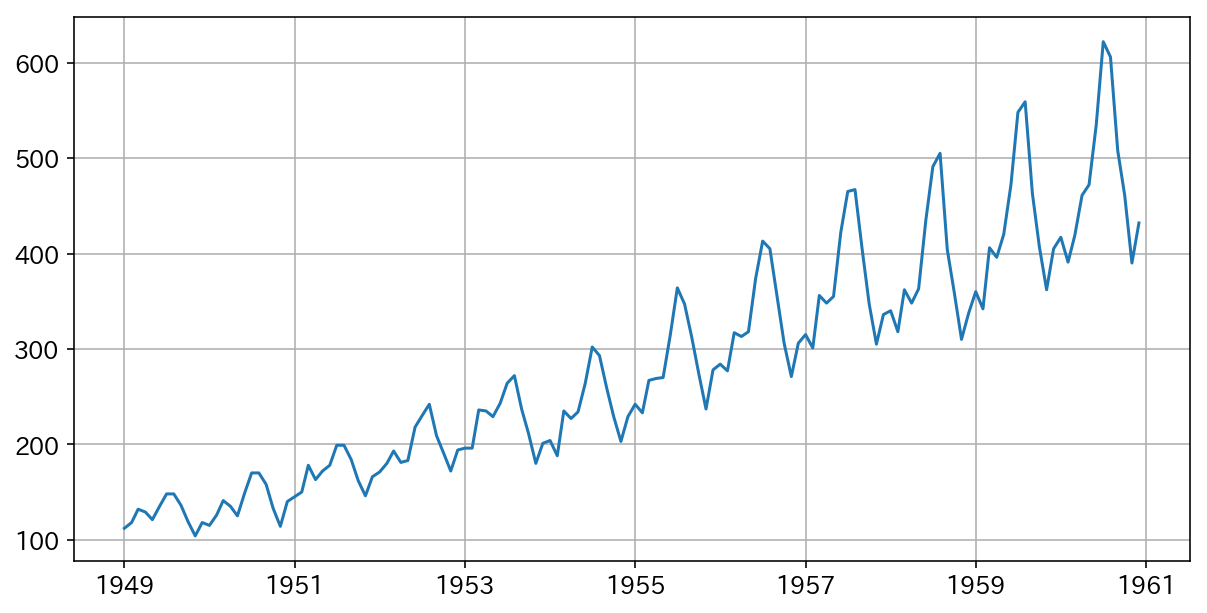

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data)
plt.grid()

# オリジナル、トレンド、季節性、残差の可視化

In [8]:
import statsmodels.api as sm

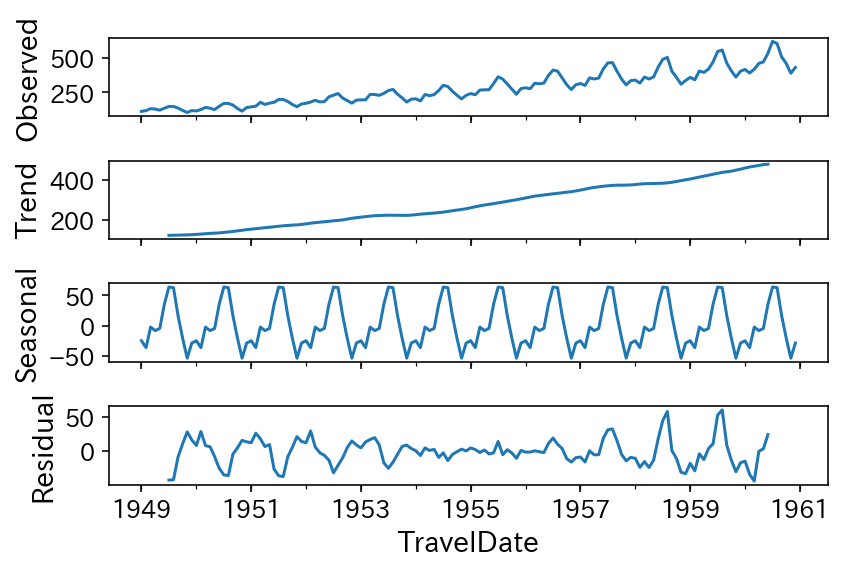

In [9]:
res = sm.tsa.seasonal_decompose(data)
fig = res.plot()

In [10]:
res.trend.head(10)

Passengers
TravelDate            
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01  126.791667
1949-08-01  127.250000
1949-09-01  127.958333
1949-10-01  128.583333

In [11]:
data[:"1949-07-01"].mean()

Passengers    127.857143
dtype: float64

In [12]:
original = data
trend = res.trend#トレンド
seasonal = res.seasonal#季節性
residual = res.resid#残差

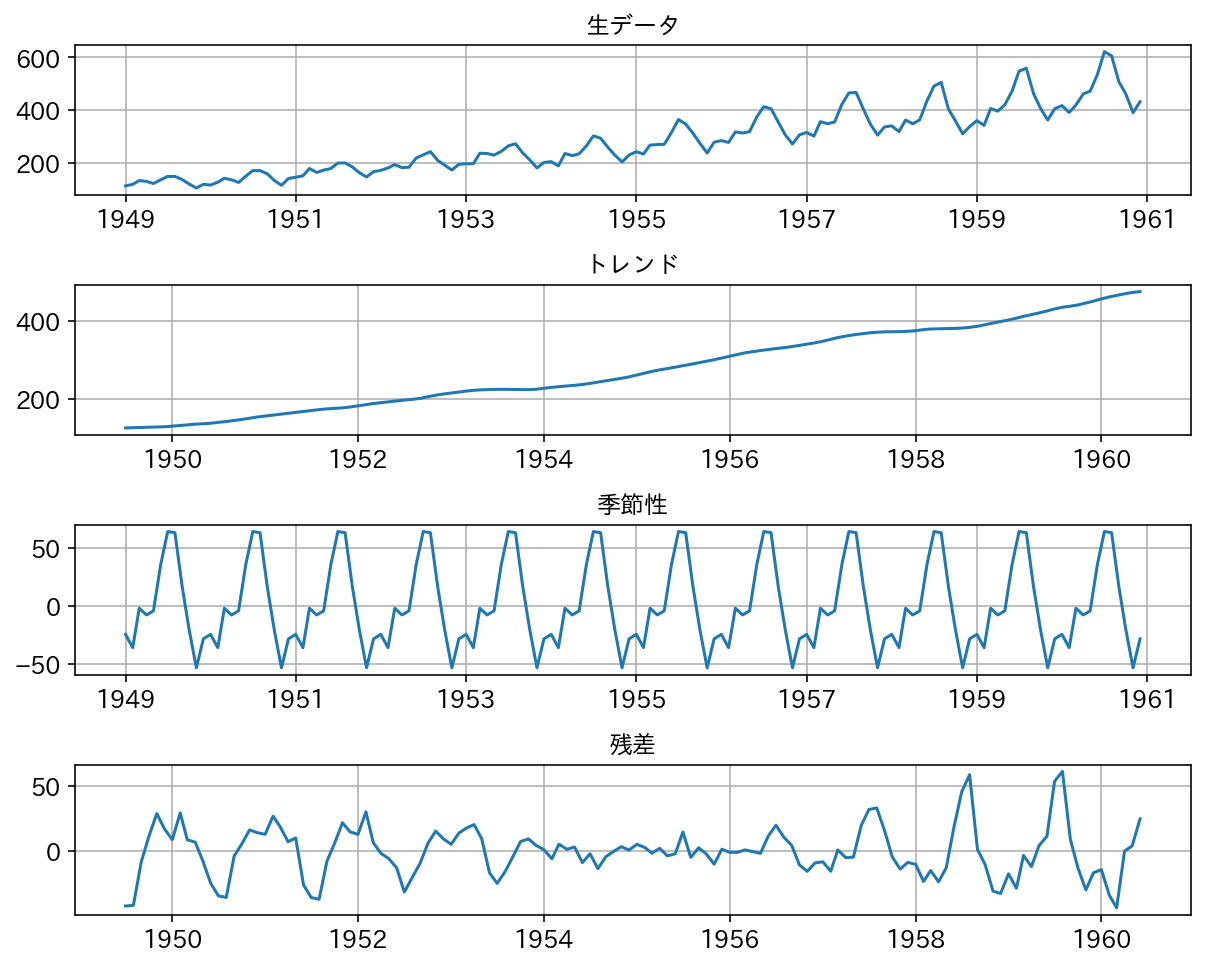

In [37]:
plt.figure(figsize=(10, 8 ))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

#可視化
plt.subplot(411)#4*1の一番上
plt.plot(original)
plt.title("生データ")
plt.grid()


plt.subplot(412)#4*1の２番目
plt.plot(trend)
plt.title("トレンド")
plt.grid()

plt.subplot(413)#4*1の２番目
plt.plot(seasonal)
plt.title("季節性")
plt.grid()

plt.subplot(414)#4*1の２番目
plt.plot(residual)
plt.title("残差")
plt.grid()

# 全部足してみて一致するか試してみる

In [14]:
sum_dates = trend + seasonal + residual
sum_dates.head(20)

Passengers
TravelDate            
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01       148.0
1949-08-01       148.0
1949-09-01       136.0
1949-10-01       119.0
1949-11-01       104.0
1949-12-01       118.0
1950-01-01       115.0
1950-02-01       126.0
1950-03-01       141.0
1950-04-01       135.0
1950-05-01       125.0
1950-06-01       149.0
1950-07-01       170.0
1950-08-01       170.0

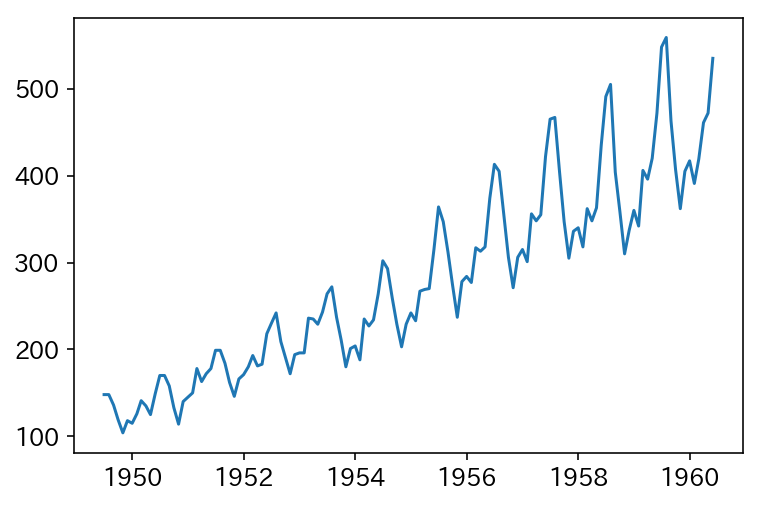

In [15]:
plt.plot(sum_dates)

In [16]:
data.Passengers.groupby(data.index.month).mean()

TravelDate
1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
Name: Passengers, dtype: float64

# 標本自己相関・標本編自己相関

## 自己相関・偏自己相関の可視化(コレログラム)

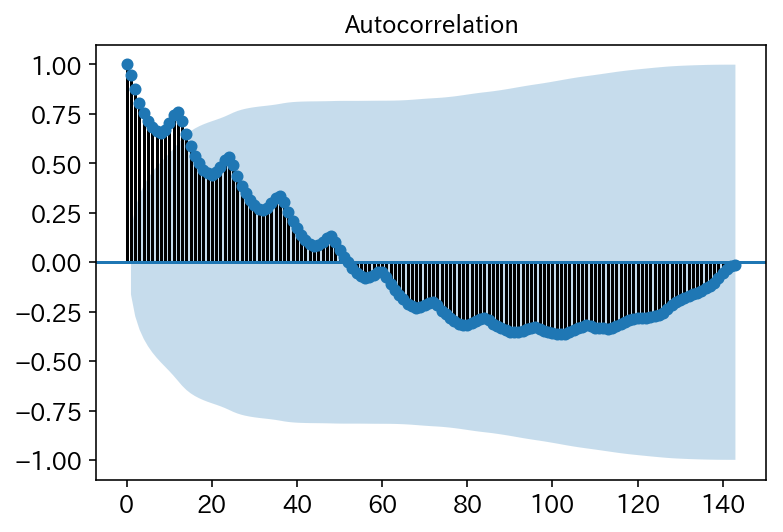

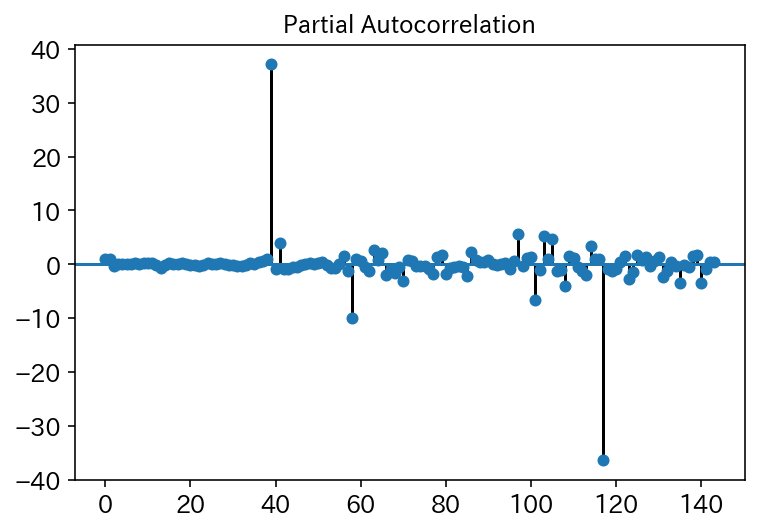

In [17]:
acf_graph = sm.tsa.graphics.plot_acf(data)#　自己相関
pacf_graph = sm.tsa.graphics.plot_pacf(data)#標本偏自己相関

## 自己相関係数

In [18]:
#自己相関
passengers_acf = sm.tsa.stattools.acf(data, nlags=40) #ラグ=40(デフォルト値)、省略可能
passengers_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

## 自己相関の実装

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]


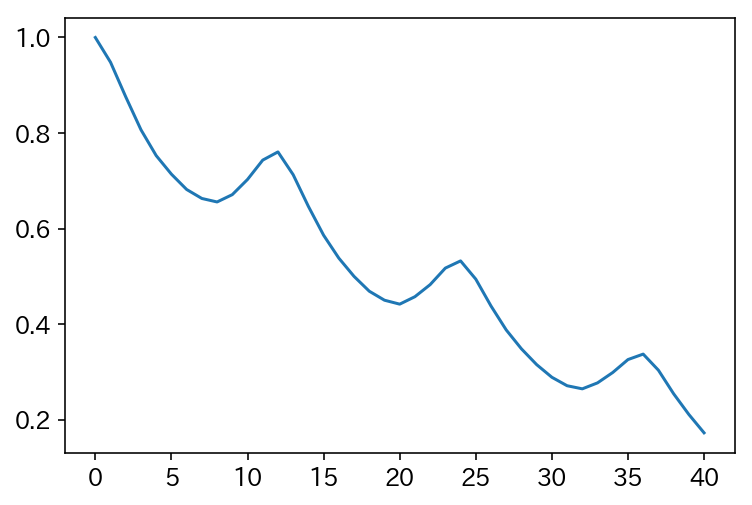

In [19]:
LAG = 40 # 計算ラグ数
rk = np.empty(LAG+1) # 自己相関係数の計算結果を保持用
y = np.array(data) # 乗客数データのpandasをndarray作成（計算用）/
y_mean = np.mean(y) #全ての日程における乗客数データの平均
 
# ラグ0の自己相関係数：1.0
rk[0] = np.sum((y - y_mean)**2) / np.sum((y - y_mean)**2) 
 
# ラグ1〜40の自己相関係数：-1.0〜1.0
for k in np.arange(1, LAG+1): 
    rk[k] = np.sum((y[k:] - y_mean)*(y[:-k] - y_mean)) / np.sum((y - y_mean)**2)
 
print(rk) # -> acf()結果と同じ
display(plt.plot(rk))

# ホワイトノイズ（正規乱数）
## 過去の値と相関がない場合

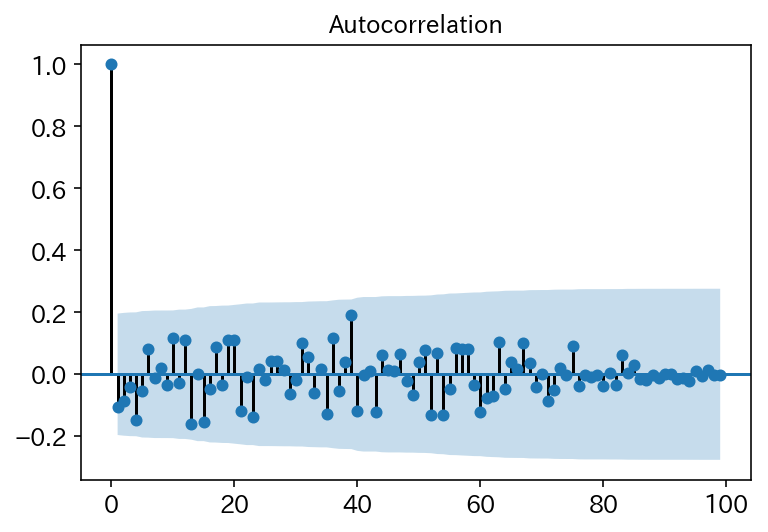

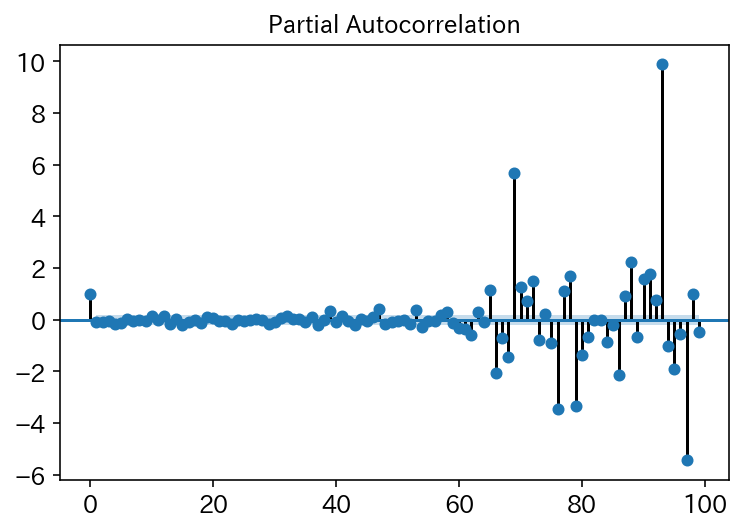

In [20]:
wn = pd.Series(np.random.randn(100))

a = sm.tsa.graphics.plot_acf(wn)
b = sm.tsa.graphics.plot_pacf(wn)

 # SARIMAモデル

# トレンドの除去

## 対数変換

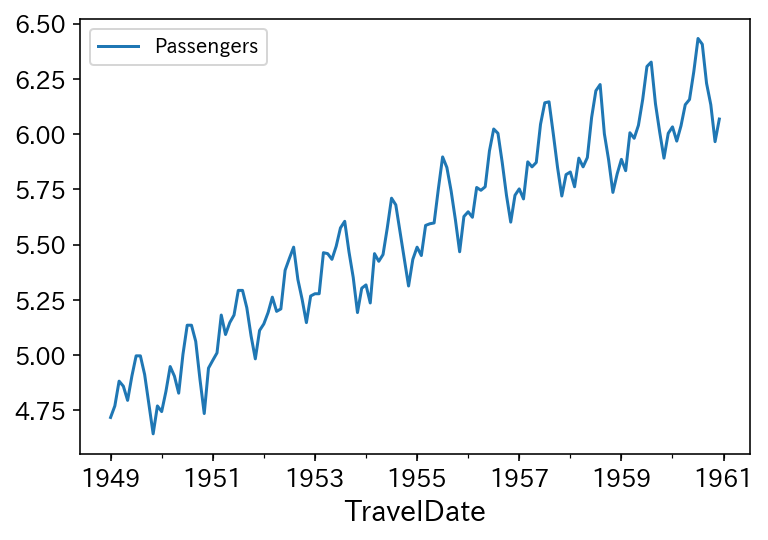

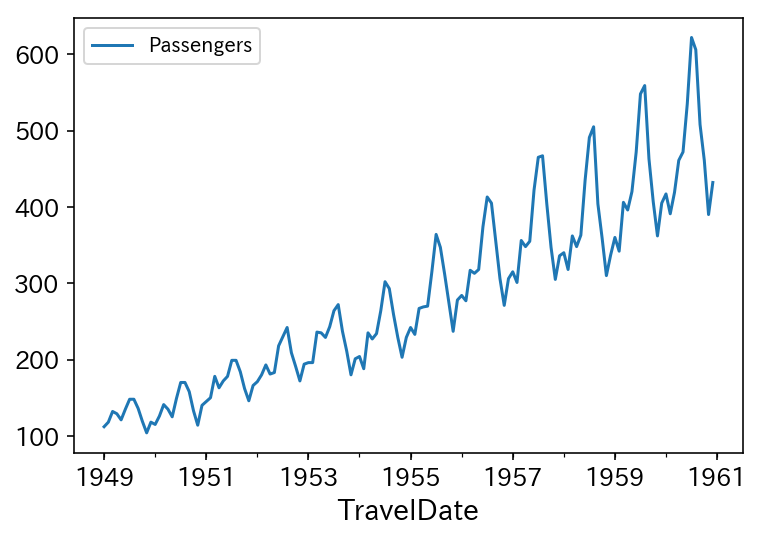

In [21]:
ldf = np.log(data)
ldf.plot()
data.plot()

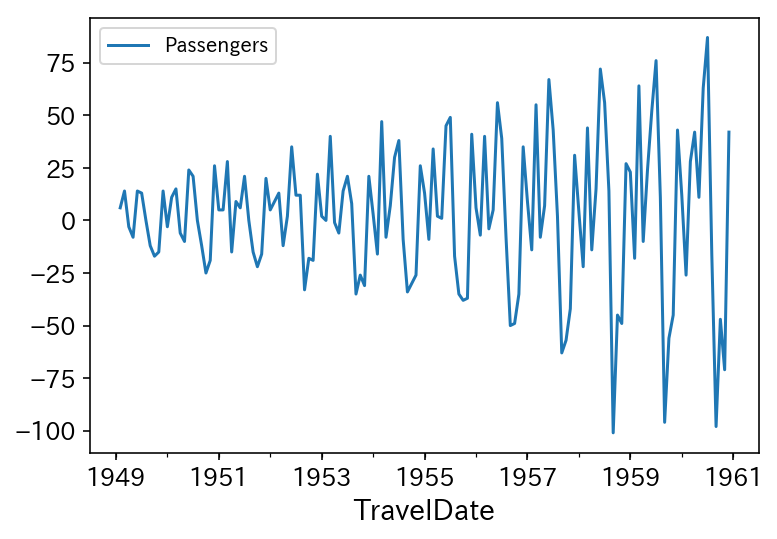

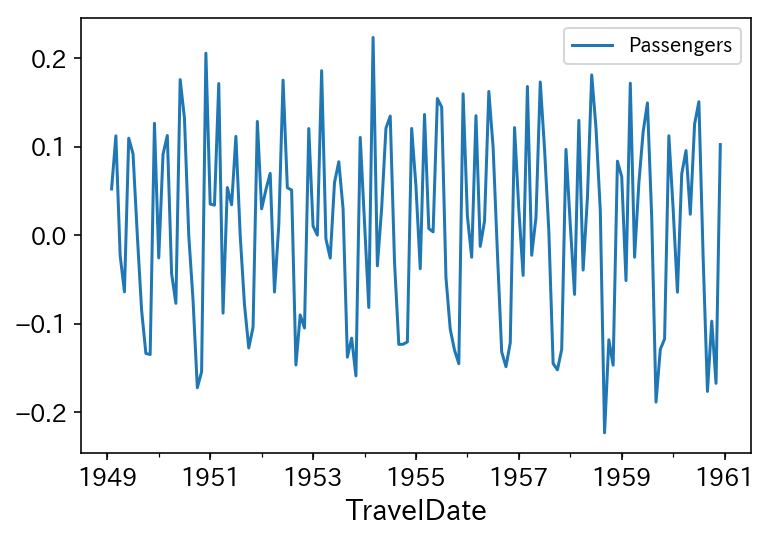

In [22]:
data.diff().plot()
#　誤差が拡大している＝＞数字が徐々に大きくなっているから分散が拡大している
ldf.diff().plot()
#対数で誤差を小さくした=>元のデータより分散が小さくなっている

## 季節性の除去 => トレンド・残差が残る

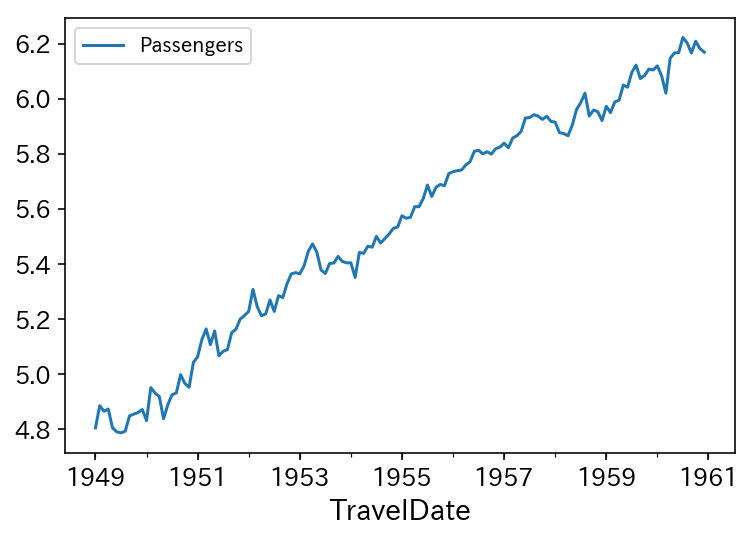

In [23]:
res = sm.tsa.seasonal_decompose(ldf)
seasonal_adjust = (ldf - res.seasonal)
seasonal_adjust.plot()

## 単位根検定 (小さいほどにいい)

In [24]:
#元データ
sm.tsa.adfuller(data['Passengers'])[1]

0.9918802434376413

In [25]:
#対数化
sm.tsa.adfuller(ldf['Passengers'])[1]

0.42236677477039125

In [26]:
#対数化+ 階差
sm.tsa.adfuller(ldf['Passengers'].diff().dropna())[1]

0.07112054815085872

In [27]:
#対数化+ 季節性除去 + 階差
sm.tsa.adfuller(seasonal_adjust['Passengers'].diff().dropna())[1]

8.099004865861495e-09

## SARIMAモデルの推定

In [28]:
mod_seasonal = sm.tsa.SARIMAX(ldf, trend='c', order=(1,1,1), seasonal_order=(0, 1, 2, 12))

res_seasonal = mod_seasonal.fit()
res_seasonal.summary()

/Users/yoshidayuusei/.pyenv/versions/3.6.5/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 2, 12)   Log Likelihood                 245.192
Date:                            Sun, 09 Dec 2018   AIC                           -478.384
Time:                                    15:54:21   BIC                           -461.133
Sample:                                01-01-1949   HQIC                          -471.374
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.184      0.854      -0.002       0.001
ar.L1          0.1745      0.208      0.841      0.400      -0.232       0.581
ma.L1         -0.5746      0.180     -3.193      0.001      -0.927      -0.222
ma.S.L12      -0.6082      0.104     -5.828      0.000      -0.813      -0.404
ma.S.L24       0.0652      0.118      0.555      0.579      -0.165       0.296
sigma2         0.0013      0.000      8.464      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       37.41   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.59   Prob(JB):                         0.15
Heteroskedasticity (H):               0.62   Skew:                            -0.03
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 元データから予測_

In [29]:
pred = res_seasonal.forecast(36)
pred

1961-01-01    6.110886
1961-02-01    6.054467
1961-03-01    6.177035
1961-04-01    6.197687
1961-05-01    6.233467
1961-06-01    6.369881
1961-07-01    6.508341
1961-08-01    6.507023
1961-09-01    6.325196
1961-10-01    6.207736
1961-11-01    6.064152
1961-12-01    6.167642
1962-01-01    6.206156
1962-02-01    6.148221
1962-03-01    6.264971
1962-04-01    6.293463
1962-05-01    6.327977
1962-06-01    6.462650
1962-07-01    6.602501
1962-08-01    6.598446
1962-09-01    6.416881
1962-10-01    6.301459
1962-11-01    6.155284
1962-12-01    6.258531
1963-01-01    6.297220
1963-02-01    6.239176
1963-03-01    6.355767
1963-04-01    6.384092
1963-05-01    6.418437
1963-06-01    6.552941
1963-07-01    6.692623
1963-08-01    6.688399
1963-09-01    6.506665
1963-10-01    6.391074
1963-11-01    6.244729
1963-12-01    6.347807
Freq: MS, dtype: float64

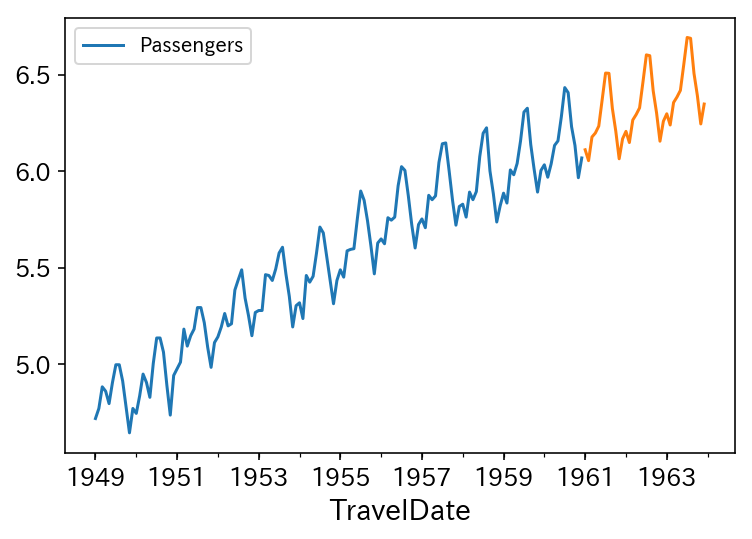

In [30]:
ax = ldf.plot()
pred.plot(ax=ax)